<div style="font-size: 30px"> <center> Linear Algebra </center></div>
<center> fall 2023 </center>
<center> Instructor: </center>
<center> Dr.Ehsan Nazerfard </center> <br>
<center> TAs: </center>
<center> Sara Rouhani,
Amir Hossein Poulad,
Mohammad Heydari Rad,
Asal Delkhosh,
Mohammad Hossein Aref,
Amir Mohammad Jafari,
Samin Mahdi Pour,
Mohammad Eshrat Abadi </center>

#### <div style="text-align: center; color: #888888; font-size: 30px">پروژه سوم درس جبر خطی کاربردی</div>
#### <div style="text-align: center; color: #888888">پیش بینی قیمت خانه</div>

<div style="text-align: right">
در این پروژه قصد داریم که با استفاده از داده‌های آماری مساحت خانه و قیمت متناظر آن در یک منطقه خاص، قیمت خانه‌ها را برای مساحت‌ها مختلف پیش بینی کنیم.
<br/><br/>
در تصویر زیر می‌توانید پراکندگی داده‌های آماری برای قیمت به ازای مساحت را مشاهده نمایید. هدف ما این است که با پیدا کردن خطی که کمترین فاصله را از داده‌ها دارد، بتوانیم قیمت تقریبی را برای مساحت‌های مختلف (از جمله مساحت‌هایی که داده‌ی مشخصی برای آنها وجود ندارد.) به دست آوریم.
<br/>

<img src="photos/data.png" style="margin-left:auto; margin-right:auto"/>

<div style="text-align: right">
در اینجا در نظر میگیریم گه داده‌های مساحت خانه، درایه‌ها ماتریس A را تشکیل می‌دهند و داده‌های قیمت درایه‌های متناظر ماتریس b را، در این حالت که Ax = b پاسخی ندارد، چرا که همانطور که مشخص است، هیچ خطی از تمام نقاط نشان داده شده عبور نمی‌کند.
<br/><br/>
پس در این صورت می‌توانیم least square solution را طبق تعریف زیر به دست بیاوریم.
<br/>

<img src="photos/def.png" style="margin-left:auto; margin-right:auto"/>

<div style="text-align: right">
برای حل این مسئله، مراحل زیر را دنبال می‌کنیم:
<br/><br/>
مرحله اول: داده‌ها را از دیتاست بخوانید (این مرحله تکمیل شده است، در نهایت شما دو آرایه به نام‌ها area و price دارید که متناظرا، مساحت و قیمت یک خانه را مشخص می‌کنند.)
<br/><br/>
مرحله دوم: با پیدا کردن جواب least square، شیب و عرض از مبدا خط مورد نظر را به دست آورید.
<br/><br/>
مرحله سوم: با استفاده از کتابخانه plot، جواب به دست آمده را در کنار داده‌ها نشان دهید.
<br/><br/>
مرحله چهارم: Mean Squared Error را برای پاسخ به دست آمده محاسبه کنید.
<br/><br/>
مرجله پنجم: تابع predict را متناسب با جواب به دست آمده تکمیل کنید، درستی جواب به دست آمده را می‌توانید با بررسی test case‌هایی که در انتها آمدهآند مشخص کنید.
<br/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

<div style="text-align: right">
مرحله اول : خواندن داده‌ها
</div>

In [3]:
data_set = pd.read_csv('./dataset/house_dataset.csv')
print ("Rows num: ", data_set.size, "\n")

area = data_set.loc[0:]['Area']
price = data_set.loc[0:]['Price']

Rows num:  1432 



<div style="text-align: right">
مرحله دوم: محاسبه جواب least sqaure و به دست آوردن مشخصات خط پاسخ
</div>

In [4]:
A = np.array(area)
y = np.array(price)
A = A.reshape(A.shape[0],1)

# add a column with all entries 1 to area
def add_column(A):
    temp = np.ones((A.shape[0], 1))
    A = np.concatenate((temp, A), axis = 1)
    return A
    
def find_least_square_cofactors(A, y):
    A = add_column(A)
    A_trans = A.transpose()
    Atrans_dot_A = np.dot(A_trans, A)
    Atrans_dot_A_inverse = np.linalg.inv(Atrans_dot_A)
    Atrans_dot_y = np.dot(A_trans, y)
    return np.dot(Atrans_dot_A_inverse, Atrans_dot_y)

In [5]:
w = 0
b = 0
w,b = find_least_square_cofactors(A, y)
print("w: ", w, " and b: ", b)

w:  5344.954584090243  and b:  99.46071089764183


<div style="text-align: right">
مرحله سوم: نمایش پاسخ
</div>

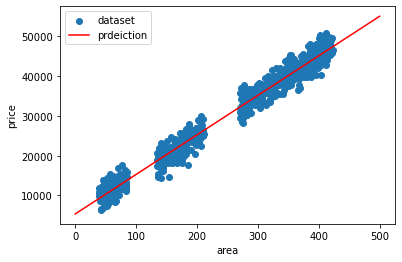

In [7]:
#show dataset points
plt.scatter(area, price, label="dataset")
x = np.linspace(0, 500, 1000)
#the answer
line = b*x+w
plt.plot(x, line, color="r", label="prdeiction")
plt.xlabel("area")
plt.ylabel("price")
plt.legend()
plt.show()

<div style="text-align: right">
مرحله چهارم : محاسبه Mean Squared Error
</div>

In [8]:
def mean_square_error():
    y_prediction = b*area+w
    differences = np.subtract(y, y_prediction)
    squared_differences = np.square(differences)
    return squared_differences.mean()

mse = mean_square_error()
print("MSE: ", mse)

MSE:  3890739.3536315025


<div style="text-align: right">
مرحله پنجم : تکمیل تابع predict و پیش بینی قیمت خانه‌ها
</div>

In [9]:
def predict(x) :
    return b*x+w

<div style="text-align: right">
test cases
</div>

In [10]:
print(predict(70))  # Correct Answer = 12307.204346925195
print(predict(110)) # Correct Answer = 16285.632782830866
print(predict(190)) # Correct Answer = 24242.489654642202
print(predict(260)) # Correct Answer = 31204.739417477125
print(predict(300)) # Correct Answer = 35183.167853382794
print(predict(370)) # Correct Answer = 42145.41761621772

12307.204346925171
16285.632782830844
24242.48965464219
31204.739417477118
35183.167853382794
42145.41761621772
